# Specific hand

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from texas_holdem import (
    deck,
    field,
    player,
    role,
    winner,
)

## Player1のハンドをAKsに固定

In [4]:
from texas_holdem import card

class Game:
    """class説明のタイトル
    classの説明文を記入

    Attributes:
        cards (list)    : cardオブジェクトをリストで保持します

    Examples:
        >>> game = Game()
        >>> game.progress() # ゲームスタート
    """

    def __init__(self, number_of_players=2):
        self.number_of_players = number_of_players
        self.players = []
        self.game_deck = deck.Deck()
        self.game_field = field.Field()

    def deal(self):

        for i in range(self.number_of_players):
            self.players.append(player.Player('player' + str(i+1)))
        
        for i in range(2):
            self.players[1].draw(self.game_deck)
        
        fix_hand = []
        fix_hand.append(card.Card('S', 1))
        fix_hand.append(card.Card('S', 13))
        self.players[0].hand = fix_hand
                
    def preflop(self):
        pass

    def flop(self):
        self.game_field.flop(self.game_deck)
        flop_card = self.game_field.community_card
        return flop_card

    def turn(self):
        self.game_field.turn(self.game_deck)
        turn_card = self.game_field.community_card[-1]
        return turn_card

    def river(self):
        self.game_field.river(self.game_deck)
        river_card = self.game_field.community_card[-1]
        return river_card

    def showdown(self):
        print(self.game_field.show_card())
        for i in range(self.number_of_players):
#             print("Player Name: {}".format(self.players[i].name))
#             print(self.players[i].show_hand())
            pass

    def judge_role(self):
        for i in range(self.number_of_players):
            self.game_role = role.Role()
            hand = self.players[i].hand + self.game_field.community_card
            self.game_role.judge(hand)
            self.players[i].role = self.game_role.role
            self.players[i].hand = self.game_role.hand

    def result_draw(self):
        print('Draw')

    def judge_winner(self):
        game_winner = winner.Winner(self.players)
        winner_index = game_winner.judge()
        if winner_index == -1:
#             self.result_draw()
            return 'Draw'
        else:
#             print(self.players[winner_index].name)
            return self.players[winner_index].name

    # ゲーム全体の進行
    def progress(self,
            preflop=False,
            flop=False,
            turn=False,
            river=False,
            winner=False):
        self.deal()
        self.preflop()
        flop_card = self.flop()
        turn_card = self.turn()
        river_card = self.river()
        self.showdown()
        self.judge_role()
        winner_player = self.judge_winner()
        if preflop:
            pass

        if flop:
            return flop_card

        if turn:
            return turn_card

        if river:
            return rever_card

        if winner:
            return winner_player

## only once

In [5]:
game = Game()
winner_player = game.progress(winner=True)

C1
D13
H6
S6
D5
None


In [6]:
winner_player

'player1'

## one hundred times

In [7]:
winner_player_list = []
for i in range(100):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

H7
D7
S7
C13
D8
None
C7
S5
D6
C1
H10
None
S6
S8
C7
H4
H3
None
C9
H1
C11
C12
S12
None
C11
C12
H12
H4
C5
None
D8
D6
S6
S5
H2
None
C3
S5
S6
H13
C10
None
H6
C13
D2
S1
D4
None
D7
C13
S7
H9
S9
None
S8
C9
S1
S4
S2
None
D1
C4
H12
C9
C12
None
S5
H11
S11
H3
S1
None
C11
H3
H2
D8
C10
None
H7
C4
C7
D10
C11
None
C9
D13
S11
C3
C6
None
D2
C2
C12
C4
C3
None
D1
H10
C9
S5
S6
None
C1
H7
H9
H6
H3
None
C1
H6
S13
S6
D2
None
D3
S11
C5
D8
C7
None
C5
C3
S7
D13
H5
None
S10
H9
H4
C4
H10
None
D12
D10
C8
H10
C6
None
D1
D11
H3
D13
C5
None
D8
H9
C5
H3
D5
None
S1
D8
S3
C3
C7
None
C6
S6
H4
H13
S9
None
S10
S1
C12
H11
C9
None
H5
S8
H12
C7
S3
None
C2
C6
H8
D2
C13
None
C11
D2
S9
H12
C2
None
H4
D1
D10
S6
S2
None
D10
H11
S11
S6
D3
None
C10
D12
H13
S8
S3
None
C5
H7
H5
S6
S1
None
H7
H12
H13
H2
S11
None
C10
S4
D13
D10
D6
None
H7
S13
C7
D11
D7
None
S6
C12
S4
H6
S3
None
C13
S8
C5
S12
S4
None
D4
C11
D10
H8
H1
None
S12
H11
H10
S5
S8
None
C13
D9
S1
D12
H10
None
D12
S8
D1
H11
D4
None
C10
H5
D5
H8
S2
None
H9
C11
H10
D4
H2
None
H10
C8


(-1.1110554495019427,
 1.1150458960773404,
 -1.1180168242160788,
 1.1008579440102895)

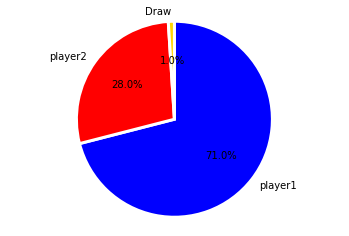

In [8]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')

## one thousand

In [9]:
winner_player_list = []
for i in range(1000):
    game = Game()
    winner_player_list.append(game.progress(winner=True))

H13
S4
C6
C2
H11
None
S7
C12
C9
C3
D9
None
C10
D12
C9
S4
S12
None
C13
D5
S1
S12
H9
None
C7
D6
C2
C11
H5
None
D2
S3
C11
C8
S10
None
S13
H6
C10
H11
H10
None
S7
C7
D2
H4
C1
None
C3
C12
D10
H13
H12
None
C6
C5
C7
D4
S11
None
C5
H12
C8
S13
S2
None
H9
S2
C1
S9
D8
None
C8
H3
S9
C12
S2
None
C5
D8
S1
H10
C4
None
S3
C9
H7
S11
D12
None
C5
C4
D3
C2
H9
None
D9
D2
S8
C4
D10
None
H2
S11
C3
C7
D5
None
S7
H13
C13
S10
C9
None
S8
S1
D3
S11
H8
None
D12
C3
C2
H12
C10
None
H12
H13
S5
H6
D3
None
D10
D11
S4
H8
C8
None
C13
S7
D11
S1
C2
None
D12
S9
C9
C4
D2
None
S13
C11
D6
S2
H13
None
H2
C10
S12
D10
S1
None
H4
S5
H13
H6
S8
None
D12
S5
C7
D11
D4
None
C1
S1
C2
H5
H1
None
C8
S4
D9
C7
S7
None
H9
H2
H10
C9
S2
None
C4
D12
S11
H8
D8
None
D12
D10
C3
C4
D11
None
H10
C4
H3
C6
H4
None
H10
H1
H2
D13
D6
None
H1
C11
H3
D6
C9
None
S11
D4
D11
C1
S6
None
D11
D7
C12
H4
S9
None
C11
H3
H2
H12
S11
None
H10
D2
D4
H4
H8
None
C12
H2
D13
S3
H3
None
S7
H6
S8
C7
D10
None
S12
D10
S13
H2
D11
None
C3
C9
S10
H1
D6
None
H12
S1
D9
D6
C1
None
C1

None
H4
C11
D2
H11
C8
None
C2
D4
C5
S5
C8
None
H9
S6
C6
D11
H8
None
S2
D3
D10
C12
S10
None
S8
D11
S13
H5
D2
None
H1
D6
D1
D12
C11
None
H12
D5
S2
S8
S10
None
H12
H2
C13
H3
D12
None
C11
H9
S5
D10
S10
None
C2
C12
D7
C10
H4
None
H10
H13
D2
C10
S9
None
S4
C5
S3
H4
S9
None
C1
H13
H2
C4
C12
None
C8
H7
H13
D3
H12
None
C3
H6
C6
C11
S5
None
C3
H9
S5
S4
S11
None
S1
S6
H12
D13
C6
None
D11
D2
S1
S2
D3
None
D7
C4
C5
H1
D6
None
H12
S13
C6
D9
D7
None
H2
C5
S13
S6
H4
None
S2
D2
C7
D12
D6
None
S1
C7
C11
H11
H12
None
D6
H9
S13
C2
D2
None
S7
S4
S9
S3
H7
None
H7
C12
S3
H3
H10
None
H8
D2
C11
C2
S12
None
D9
S6
D13
S3
H4
None
D6
H11
S13
H8
D9
None
S1
C2
H5
S12
C1
None
S12
H2
C5
C6
D2
None
S10
D10
C4
C11
S11
None
S8
S12
C2
S6
D3
None
S10
S7
D6
H11
H2
None
C1
H1
C2
D12
D4
None
S9
C9
H5
S8
S5
None
S1
S12
H8
C8
S3
None
C11
C12
S3
H4
H8
None
S5
C5
H4
D12
C3
None
H10
S12
S4
H8
H13
None
H2
D13
D12
C13
H1
None
C2
S12
C3
H7
C7
None
S5
D10
S3
H13
S9
None
H13
H5
D1
C1
D13
None
S13
H4
H13
D1
S6
None
C5
D11
C8
D6
D5
None


H10
D11
C7
D8
None
D4
D11
D8
C13
C10
None
C3
D13
H5
S4
H2
None
C11
H6
S9
C8
C10
None
C10
S5
H13
C2
S9
None
S12
D6
S13
C3
S6
None
C11
H12
C5
S8
D11
None
H10
D8
H6
C5
C4
None
C1
S6
D9
D13
D7
None
D11
H11
S7
H10
S13
None
H10
C1
H8
C5
C2
None
D10
H7
S13
D11
C12
None
C10
C5
D6
D2
D9
None
H6
C7
D5
C13
C11
None
H4
C13
S3
D6
D10
None
S9
C11
H6
S13
D10
None
D13
D10
S13
S1
C11
None
D1
H2
D7
S2
C12
None
D3
S9
S2
D4
D12
None
D11
H6
H1
S3
H7
None
H2
D13
S13
H13
S3
None
C9
H8
H4
S11
D9
None
D1
S3
S5
S8
C1
None
D9
S9
H10
C13
H11
None
S1
S9
S11
S3
C13
None
D9
S1
C6
S4
D2
None
S11
C11
H13
D8
D3
None
S6
D13
C8
S2
S1
None
S9
D8
C2
S5
C13
None
D12
S7
D10
C12
C4
None
S3
H9
C3
C6
H8
None
S13
D12
H5
H6
D13
None
C9
C7
D3
S3
D11
None
H13
S9
C11
C1
H4
None
C1
C2
C5
C8
S5
None
C7
C1
C8
S12
H4
None
D12
H3
C1
C8
D10
None
D8
D12
D3
C2
D2
None
C1
D1
D8
D6
C4
None
C9
D2
H9
D5
D6
None
S12
S4
H2
D12
H13
None
D11
S10
C13
C11
D3
None
C12
C5
D9
S3
C11
None
S13
S6
S3
H5
C1
None
S2
C11
S4
D7
D9
None
S13
D6
C8
C3
S6
None
S1


(-1.1082623565591907,
 1.1164543565226124,
 -1.117217937623805,
 1.1008199025235046)

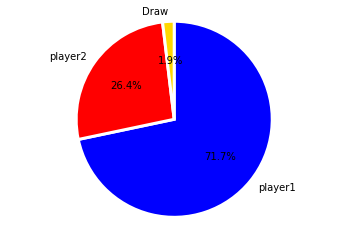

In [10]:
win_p1 = winner_player_list.count('player1')
win_p2 = winner_player_list.count('player2')
draw = winner_player_list.count('Draw')
count_of_all = win_p1 + win_p2 + draw

label = ['player1', 'player2', 'Draw']
colors = ['blue', 'red', 'gold']
x = np.array([win_p1, win_p2, draw])
plt.pie(x, labels=label, counterclock=False, startangle=90, colors=colors,
       wedgeprops={'linewidth': 3, 'edgecolor':"white"}, autopct="%1.1f%%")
plt.axis('equal')